In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [3]:
def I(t):
    return 150 + 100*np.cos(2*np.pi/365*(t + 11))

In [4]:
def Td(t):
    return 11 + 4*np.cos(2*np.pi/365*(t - 10))

In [5]:
def Tm(T,t):
    return (T + Td(t))/2

In [104]:
def beta_c(T,t):
    return 0.35 + 0.015*Tm(T,t) + 0.0012*(Tm(T,t))**2

In [7]:
def f_uw(uw):
    return 9.2 + 0.46*uw**2

In [108]:
def Ce(T,t,uw=4.8):
    return 4.5 + 0.05*T + (beta_c(T,t) + 0.47)*f_uw(uw)

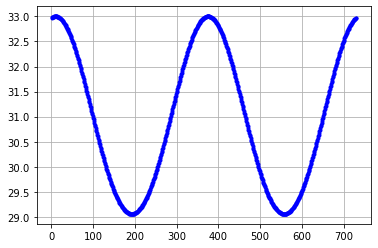

In [109]:
plt.plot(t,Ce(T0,t),'b.-')
plt.grid(True)
plt.show()

In [9]:
def Te(T,t):
    return Td(t) + I(t)/Ce(T,t)

In [100]:
def Hn(T,t):
    return Ce(T,t)*(Te(T,t) - T)

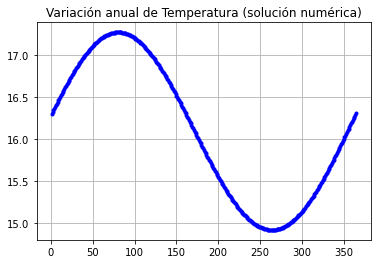

In [133]:
Cp=1 # calor específico del agua (kcal/°C/kg)
rho_w=1000 # densidad del agua (kg/m^3)
D=10 # profundidad del lago (m)
t = np.arange(1,366)
f = lambda T,t: Hn(T,t)/(Cp*rho_w*D)
T0 = 16.3 # temperatura inicial (°C)
T = odeEuler(f,T0,t)
plt.plot(t,T,'b.-')
#plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Variación anual de Temperatura (solución numérica)")
plt.show()